First 5 rows of the dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

Shape of the dataset (rows, columns): (541909, 8)

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 

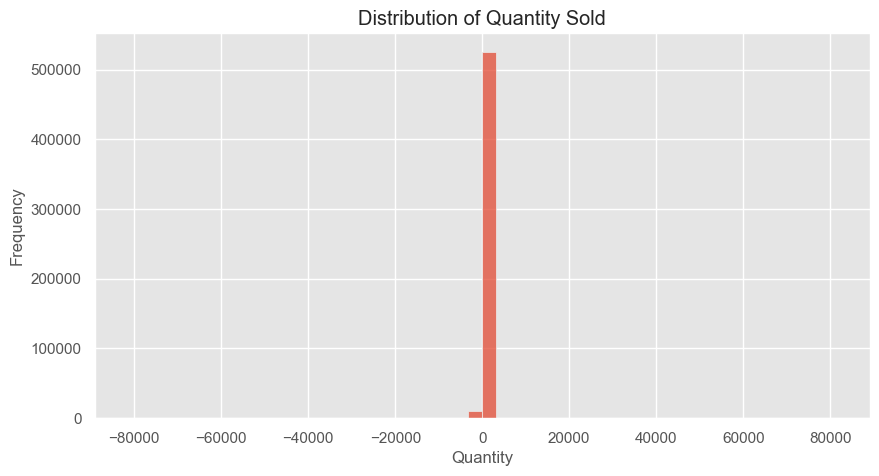

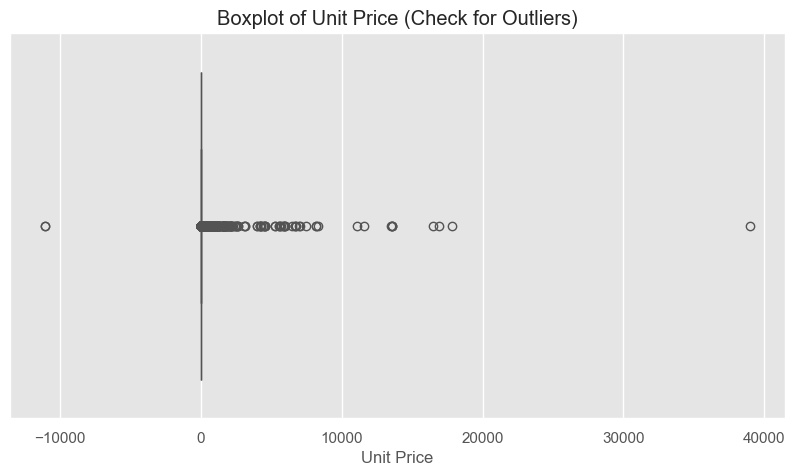

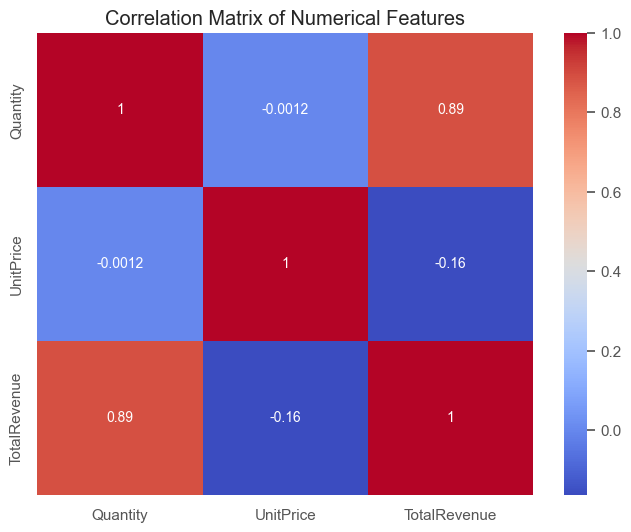

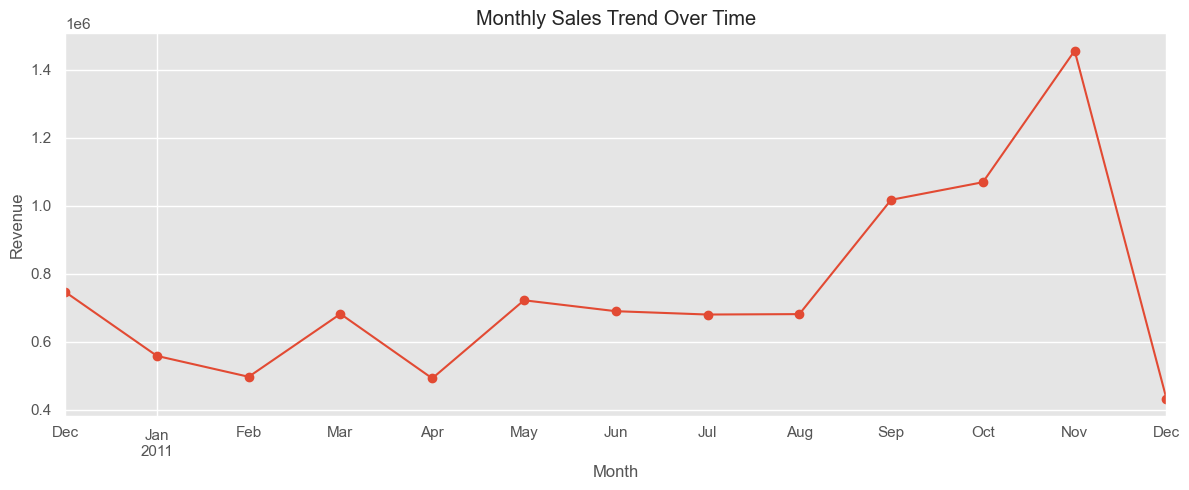

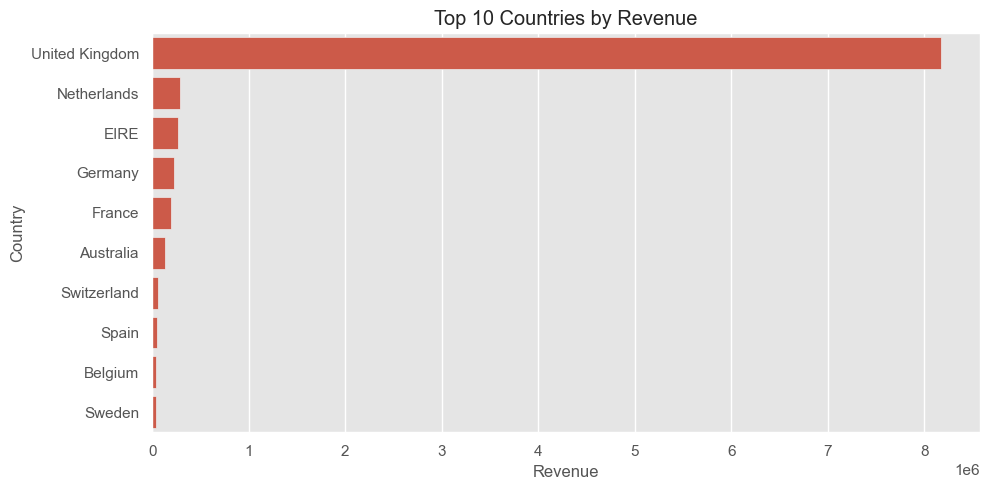

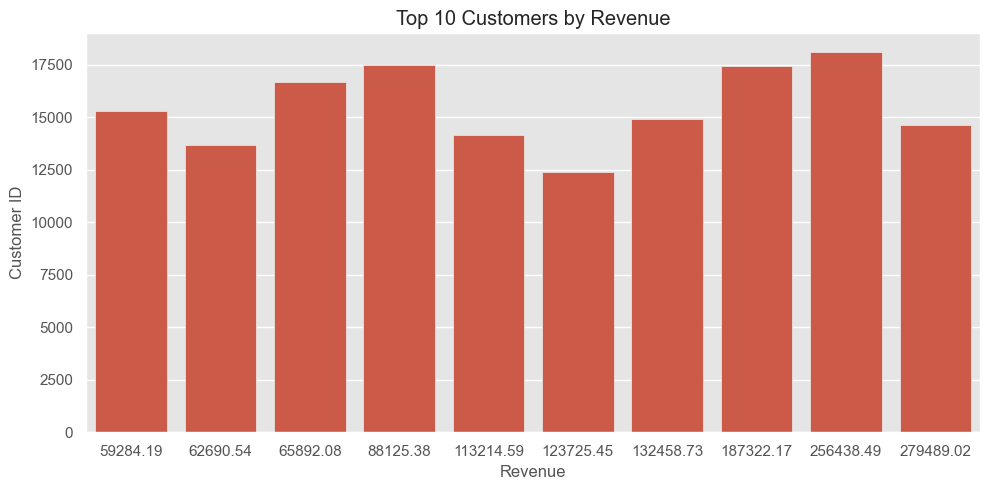

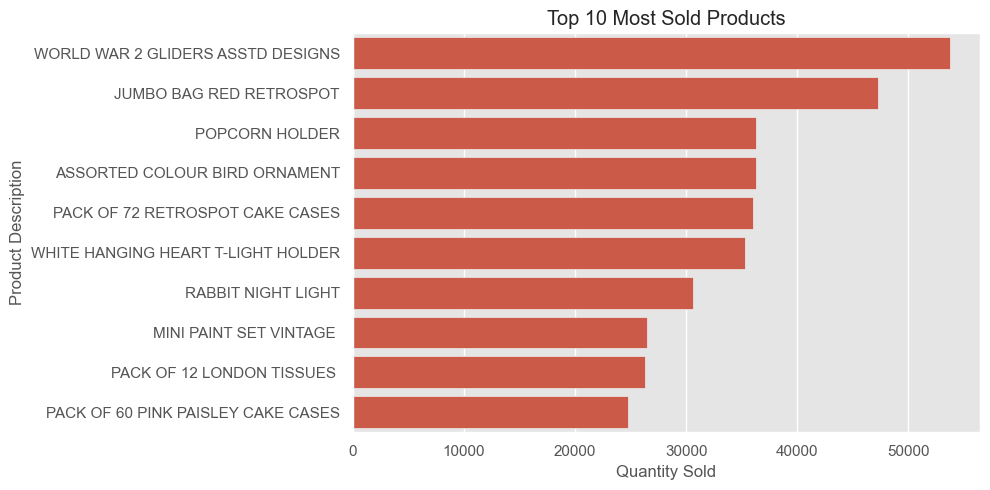

Cleaned dataset saved as 'cleaned_online_retail.csv'

Documented Key Insights:
• Total Revenue: £8887208.89
• Top Revenue-Generating Country: United Kingdom
• Top Customer (by revenue): Customer ID 14646
• Top Selling Product: WORLD WAR 2 GLIDERS ASSTD DESIGNS


In [3]:
#This Full code is followed by EDA_Checklist's Guidance
# 1. Import necessary libraries (Pandas, Numpy, Matplotlib, Seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.style.use("ggplot")

# 2. Load the dataset using Pandas
df = pd.read_excel("Online Retail.xlsx")

# 3. View first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())
print()

# 4. Understand the shape and structure of the dataset
print("Shape of the dataset (rows, columns):", df.shape)
print("\nBasic information about the dataset:")
print(df.info())
print()

# 5. Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
print()

# 6. Identify and remove duplicates
print("Number of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicate rows removed.")
print()

# 7. Summary statistics of numerical features
print("Summary statistics of numerical columns:")
print(df.describe())
print()

# 8. Analyze categorical columns
print("Top 10 most frequent countries:")
print(df['Country'].value_counts().head(10))
print()

print("Top 10 most sold products:")
print(df['Description'].value_counts().dropna().head(10))
print()

# 9. Visualize distributions (histograms, boxplots, countplots)
# Histogram for Quantity
plt.figure(figsize=(10,5))
sns.histplot(df['Quantity'], bins=50, kde=False)
plt.title("Distribution of Quantity Sold")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

# Boxplot for UnitPrice
plt.figure(figsize=(10,5))
sns.boxplot(x=df['UnitPrice'])
plt.title("Boxplot of Unit Price (Check for Outliers)")
plt.xlabel("Unit Price")
plt.show()

# 10. Correlation matrix
# Add TotalRevenue before correlation analysis
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']
numeric_df = df[['Quantity', 'UnitPrice', 'TotalRevenue']]
corr_matrix = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# 11. Time-based analysis (e.g., sales trends over time)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalRevenue'].sum()

plt.figure(figsize=(12,5))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend Over Time")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()

# 12. Grouping and aggregation
# Top 10 countries by revenue
top_countries = df.groupby("Country")["TotalRevenue"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# Top 10 customers by revenue
top_customers = df.groupby("CustomerID")["TotalRevenue"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.values, y=top_customers.index.astype(int))
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Customer ID")
plt.tight_layout()
plt.show()

# Top 10 products by quantity sold
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Most Sold Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Description")
plt.tight_layout()
plt.show()

# 13. Save cleaned data if necessary
# Data cleaning steps
df_cleaned = df.dropna(subset=["CustomerID"])
df_cleaned = df_cleaned[(df_cleaned["Quantity"] > 0) & (df_cleaned["UnitPrice"] > 0)]
df_cleaned.to_csv("cleaned_online_retail.csv", index=False)
print("Cleaned dataset saved as 'cleaned_online_retail.csv'")
print()

# 14. Document insights and observations
total_revenue = df_cleaned['TotalRevenue'].sum()
top_country = top_countries.index[0]
top_customer = top_customers.index[0]
top_product = top_products.index[0]

print("Documented Key Insights:")
print(f"• Total Revenue: £{total_revenue:.2f}")
print(f"• Top Revenue-Generating Country: {top_country}")
print(f"• Top Customer (by revenue): Customer ID {int(top_customer)}")
print(f"• Top Selling Product: {top_product}")